# Dependences

In [664]:
include("../../../src/struct_data.jl")
using Plots

# Functions Prev

## range_interval

In [665]:
function sphere_range(bias_lenght,bias_size,N,span)
    Δ_int = N/5
    bias_m = bias_lenght/bias_size
    da = bias_lenght/Δ_int
    db = (50-3*bias_lenght/2)/Δ_int

    return (span[2]-span[1]) .*vcat(
        collect(0:da:bias_lenght),
        collect(bias_lenght+db:db:50-bias_m),
        collect(50-bias_m+da:da:50+bias_m),
        collect(50+bias_m+db:db:100-bias_lenght),
        collect(100-bias_lenght+da:da:100)
    )./100 .+ span[1]
end

sphere_range (generic function with 4 methods)

## max_min agg

In [666]:
function max_min_agg(data,N, bias_lenght, bias_size)
    dx = (minimum(data[:,1]), maximum(data[:,1]))
    d_data_x = (dx[2]-dx[1])/N

    agg_range = sphere_range(
        10,
        2,
        N,
        [
            minimum(data[:,1]),
            maximum(data[:,1])
        ]
    )

    min_max = Vector()
    for i=1:size(agg_range,1)
        data_find = data[(agg_range .- (d_data_x/4))[i] .< data[:,1] .<= (agg_range .+ (d_data_x/4))[i],2]
        if size(data_find,1) == 0
            push!(min_max, [0 0])
            push!(min_max, [0 0])
        else
            push!(min_max,[agg_range[i] minimum(data_find)])
            push!(min_max,[agg_range[i] maximum(data_find)])
        end
    end
    min_max =vcat(min_max...)
    min_max .-= sum(min_max, dims=1)/size(min_max,1)
    return min_max
end

max_min_agg (generic function with 2 methods)

# Max-Min

Animating ... 100%|██████████████████████████████████████| Time: 0:00:28
[ Info: Saved animation to /home/nicomosty/Documentos/MaestriaUNAL/CellAggregate.jl/test/ExtractInfo/SimData/tmp.gif


Plots.AnimatedGif("/home/nicomosty/Documentos/MaestriaUNAL/CellAggregate.jl/test/ExtractInfo/SimData/tmp.gif")
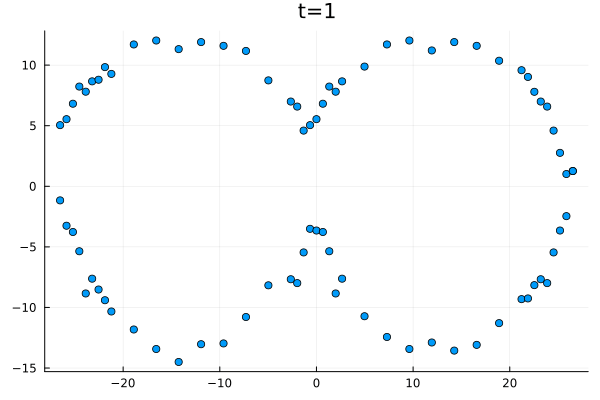

In [668]:
N =40
bias_lenght = 10
bias_size = 2

T = sum(typeof.(readdlm("Test_1.xyz")[:,1]) .== SubString{String})
size_data = 5008
p = Progress(T,"Animating ...")
anim = @animate for t = 1:T
    data = readdlm("Test_1.xyz")[(size_data+2)*t - (size_data-1):(size_data+2)*t,2:end]
    max_min = max_min_agg(data,N,bias_lenght,bias_size)
    plot(
        max_min[:,1], max_min[:,2],
        title = "t=$(t)",
        seriestype=:scatter,
        legend = false
    )
    next!(p)
end

gif(anim, fps=2)

# Max-Min_Cil

Animating ... 100%|██████████████████████████████████████| Time: 0:00:31
[ Info: Saved animation to /home/nicomosty/Documentos/MaestriaUNAL/CellAggregate.jl/test/ExtractInfo/SimData/tmp.gif


Plots.AnimatedGif("/home/nicomosty/Documentos/MaestriaUNAL/CellAggregate.jl/test/ExtractInfo/SimData/tmp.gif")
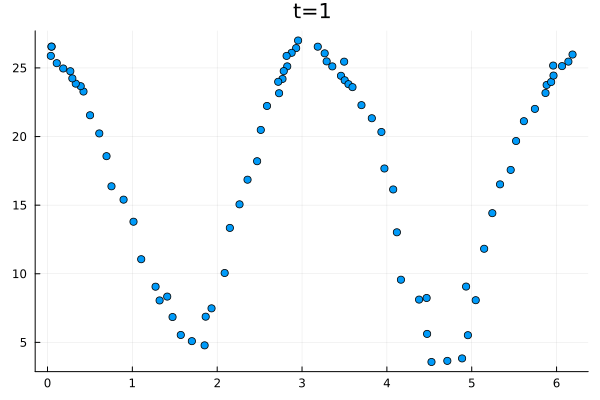

In [676]:
N =40
bias_lenght = 10
bias_size = 2

T = sum(typeof.(readdlm("Test_1.xyz")[:,1]) .== SubString{String})
size_data = 5008
p = Progress(T,"Animating ...")
anim = @animate for t = 1:T
    data = readdlm("Test_1.xyz")[(size_data+2)*t - (size_data-1):(size_data+2)*t,2:end]
    max_min = max_min_agg(data,N,bias_lenght,bias_size)

    θ = [max_min[i,2] >= 1 ? pi/2-atan(max_min[i,1]/max_min[i,2]) : 3*pi/2-atan(max_min[i,1]/max_min[i,2]) for i=1:size(max_min,1)] 
    r = sqrt.(sum(max_min .^ 2, dims=2))

    max_min_cil = hcat(θ,r)

    plot(
        max_min_cil[:,1], max_min_cil[:,2],
        title = "t=$(t)",
        seriestype=:scatter,
        legend = false
    )
    next!(p)
end

gif(anim, fps=2)